<a href="https://colab.research.google.com/github/AbhinavShedmekhe03/Capstone-Project-AirBNB/blob/main/AirBNB_Capstone_Project_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
listings = pd.read_csv('listings.csv')
hosts = pd.read_csv('hosts.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')

# PROBLEM STATEMENTS

**PROBLEM 1**

Look at the table Calendar how many rows and unique listing ids are present? Are
there any implications when it comes to having more rows and less unique listing
ids?

In [ ]:
calendar.shape

(319192, 8)

In [ ]:
calendar.head(5)

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   calender_id     319192 non-null  int64  
 1   listing_id      319192 non-null  int64  
 2   date            319192 non-null  object 
 3   available       319192 non-null  int64  
 4   price           319117 non-null  float64
 5   adjusted_price  319117 non-null  float64
 6   minimum_nights  319192 non-null  int64  
 7   maximum_nights  319192 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 19.5+ MB


In [ ]:
calendar['listing_id'].nunique()

1749

Upon inspection, it is found that calendar dataset has 319192 rows in total whereas there are only 1749 unique listing IDs. Which could imply below mentioned points:

1. There are multiple listings for individual listing IDs which could provide detailed information about the the availability and pricing over the time period.
2. Having multiple unique listing IDs could also provide insight into the price trend over time.
3. On the other hand we also need to check for the data redundecy which could result in poor ML model.

**Data Summary for Calendar Table:**

- **Rows**: 319,192
- **Columns**: 8
- **Unique Listing IDs**: 1,749
- **Data Types**: Float64, Int64, Object
- **Missing Values**: Some in 'price' and 'adjusted_price'
- **Implications**: Granular availability and pricing data over time; potential redundancy with multiple rows per listing.


**PROBLEM 2**

Look at the price column in Calendar table. What transformations you will need to
perform so that you can create a column that can be used as a target/response
variable?

In [ ]:
calendar['price'].isnull().sum()

75

In [ ]:
calendar['price'].describe()

count    319117.000000
mean        109.917779
std         185.791168
min          13.000000
25%          59.000000
50%          79.000000
75%         115.000000
max        5800.000000
Name: price, dtype: float64

In [ ]:
#calendar['adjusted_price'].describe()

<Axes: >

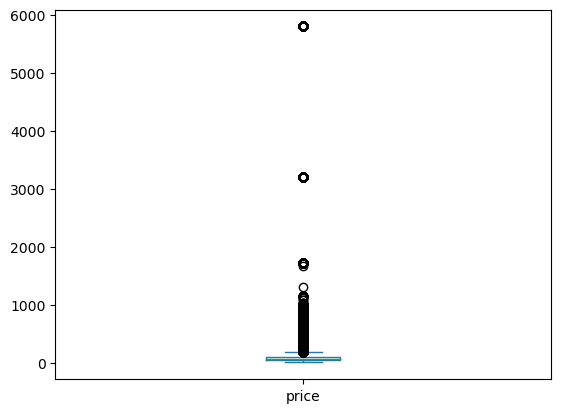

In [ ]:
calendar['price'].plot(kind='box')

<Axes: ylabel='Density'>

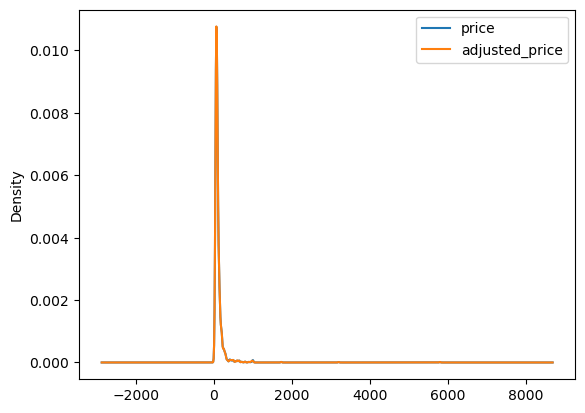

In [ ]:
calendar[['price','adjusted_price']].plot(kind='kde')

In [ ]:
calendar['price'].skew()

19.171456826061497

From the following investigation on the calendar dataset, it is recommened to apply the below given transformation techniques:
1. Converting 'date' to datetime
2. Handle the missing vales by imputation with median
3. Handle the outliers to eliminate the extreme values
4. Consider applying log transformation to reduce skewness as at present is 19.17 which is highly skewed.

**NOTE**

In this scenario a skewness of 19.17 shows highly positive skewed curve which implies that the majority of the data points are concentrated on the lower end of the distribution, with few extreme values dragging the mean towards the right i.e **109**.

**Convering 'date' to datetime in Calendar dataset**

In [ ]:
calendar['date'] = pd.to_datetime(calendar['date'])

**Applying Transformation of 'adjusted_price' column of Calendar dataset.**

In [ ]:
# handling missing values
calendar['adjusted_price'].fillna(calendar['adjusted_price'].median(), inplace=True)

# checking for the result
calendar['adjusted_price'].isnull().sum()

0

In [ ]:
# handling outliers
q1 = calendar['adjusted_price'].quantile(0.25)
q3 = calendar['adjusted_price'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
calendar['adjusted_price'] = calendar['adjusted_price'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

<Axes: ylabel='Density'>

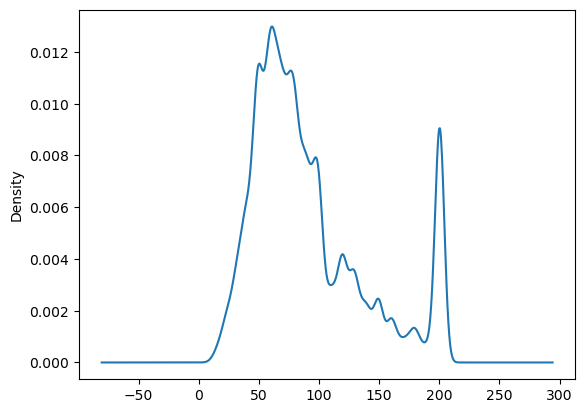

In [ ]:
calendar['adjusted_price'].plot(kind='kde')

In [ ]:
calendar['adjusted_price'].skew()

0.997556754497966

In [ ]:
# applying log transformation
calendar['adjusted_price_log'] = np.log1p(calendar['adjusted_price'])

In [ ]:
# checking the skewness after log transformation
skewness_after_log_transformation = calendar['adjusted_price_log'].skew()
print("Skewness of 'adjusted_price' column after log transformation :", skewness_after_log_transformation)

Skewness of 'adjusted_price' column after log transformation : -0.03668620530881758


**PROBLEM 3**

Look at the tables Listings, Hosts and Reviews to come up with a list of potential
transformations needed in order to have predictors that can be used to predict the
listing price.

Let's start off with, **'listings'** dataset

In [ ]:
listings.shape

(1749, 14)

In [ ]:
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


**Potential Transformations and Feature Engineering**

1. Handling missing values in 'bedrooms' and 'beds' by imputing them with median.
2. One Hot Encoding for Property and Room Types.
3. Extracting features from Amenities.
4. Extracting Geographical information from Long and Lat.

In [ ]:
listings.columns

Index(['listing_id', 'listing_url', 'name', 'description', 'latitude',
       'longitude', 'property_type', 'room_type', 'accomodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'host_id'],
      dtype='object')

In [ ]:
print('Number of total Property Categories :', listings['property_type'].nunique())
print('\nCategories of Property:\n\n', listings['property_type'].unique())

Number of total Property Categories : 39

Categories of Property:

 ['Room in boutique hotel' 'Entire rental unit'
 'Entire condominium (condo)' 'Private room in residential home'
 'Private room in rental unit' 'Private room in townhouse' 'Entire loft'
 'Entire residential home' 'Private room in boat'
 'Private room in bed and breakfast' 'Entire townhouse'
 'Private room in loft' 'Shared room in residential home' 'Entire cottage'
 'Private room' 'Entire villa' 'Yurt' 'Houseboat'
 'Private room in condominium (condo)' 'Tent' 'Entire serviced apartment'
 'Tiny house' 'Entire guest suite' 'Private room in guest suite'
 'Room in hotel' 'Private room in guesthouse' 'Private room in villa'
 'Entire guesthouse' 'Room in aparthotel'
 'Private room in religious building' 'Shared room in loft'
 'Casa particular' 'Private room in serviced apartment'
 'Shared room in bed and breakfast' 'Private room in casa particular'
 'Shared room in casa particular' 'Boat' 'Entire vacation home' 'Castle']


In [ ]:
print('Total number of room types: ', listings['room_type'].nunique())
print('\nRoom Tyes:\n\n', listings['room_type'].unique())

Total number of room types:  4

Room Tyes:

 ['Hotel room' 'Entire home/apt' 'Private room' 'Shared room']


**Getting Descriptive Stats for 'bedrooms' and 'beds'**

In [ ]:
listings[['bedrooms','beds']].describe()

,bedrooms,beds
count,1621.000000,1708.000000
mean,1.529303,2.220726
std,1.091453,2.227509
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,3.000000
max,20.000000,44.000000


In [ ]:
listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)
listings['beds'].fillna(listings['beds'].median(), inplace=True)

**Perfoming One Hot Encoding for 'property_type' and 'room_type'**

In [ ]:
listings_encoded = pd.get_dummies(listings, columns=['property_type','room_type'], dtype='int64')
listings_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   listing_id                                         1749 non-null   int64  
 1   listing_url                                        1749 non-null   object 
 2   name                                               1749 non-null   object 
 3   description                                        1679 non-null   object 
 4   latitude                                           1749 non-null   float64
 5   longitude                                          1749 non-null   float64
 6   accomodates                                        1749 non-null   int64  
 7   bathrooms_text                                     1749 non-null   object 
 8   bedrooms                                           1749 non-null   float64
 9   beds    

---
***Doubts Related to Amenities***

In [ ]:
print('Types of Amenities:', listings['amenities'].nunique())

Types of Amenities: 1656


How to tackle this given scenario as the number of unique amenities are huge and it will not be feasible for us to one hot encode such column. What's the right approach?

---

Going further... Let's look into **'hosts'** dataset.

In [ ]:
hosts.shape

(1111, 5)

In [ ]:
hosts['host_id'].nunique()

1111

Upon first inspection, we can say that there are fewer unique hosts IDs than unique listing IDs. From this we can infer that some hosts might have multiple listings on the platform. This is a very common scenarios in platforms like Airbnb, where one host can manage multiple properties for rent.

In [ ]:
hosts.head(5)

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [ ]:
hosts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


**Potential Transformations and Feature Engineering**
1. Convert 'host_since' to datetime
2. One Hot Encode 'host_location'
3. Handle missing values in 'host_location' and 'host_about'

**Convert 'host_since' to datetime**

In [ ]:
hosts['host_since'] = pd.to_datetime(hosts['host_since'])

**Checking for 'host_location' column for one hot encoding**

In [ ]:
hosts['host_location'].nunique()

149

As from the glance of number of unique host location it is not feasible to go for one hot encoding.

In [ ]:
# checking for null values in host_locations
null_locations = hosts[hosts['host_location'].isnull()]
print(null_locations)

       host_id host_name host_since host_location host_about
517   57235200  Philippe 2016-02-03           NaN        NaN
587   79089379   Mathias 2016-06-21           NaN        NaN
665  115662416       Tom 2017-02-09           NaN        NaN


For the time being, let's keep these values as NaN. As this could provide us with some insight about the impact on price due to such scenarios.

---

Let's get moving with the last dataset i.e **'Reviews'**

In [ ]:
reviews.shape

(62987, 6)

In [ ]:
reviews['listing_id'].nunique()

1525

In [ ]:
reviews.head(5)

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62922 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


For this given dataset, the fundamental transformation could be chaning the 'date' column to datetime.

In [ ]:
reviews['date'] = pd.to_datetime(reviews['date'])

---

**PROBLEM 4**

Create an aggregated view of data spread across different tables, containing the
target as well as predictor variables.

In [ ]:
merged_data_1 = pd.merge(listings_encoded, calendar, on='listing_id', how='inner')

In [ ]:
merged_data_2 = pd.merge(merged_data_1, hosts, on='host_id', how='inner')

In [ ]:
merged_data = pd.merge(merged_data_2, reviews, on='listing_id', how='inner')

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11468769 entries, 0 to 11468768
Data columns (total 72 columns):
 #   Column                                             Dtype         
---  ------                                             -----         
 0   listing_id                                         int64         
 1   listing_url                                        object        
 2   name                                               object        
 3   description                                        object        
 4   latitude                                           float64       
 5   longitude                                          float64       
 6   accomodates                                        int64         
 7   bathrooms_text                                     object        
 8   bedrooms                                           float64       
 9   beds                                               float64       
 10  amenities                   

In [ ]:
merged_data_1.shape

(319192, 63)

In [ ]:
merged_data_2.shape

(319192, 67)

In [ ]:
merged_data.shape

(11468769, 72)

Upon merging the dataset, the final 'merged_data' shows the shape of the dataset as (11468769, 72) by which it can be infered that there are multiple reviews for an individual lising_id, which results in the increase in the the number of rows from 319192 to 11468769.

In [ ]:
null_counts = merged_data.isnull().sum()
print(null_counts[null_counts > 0])

description       122750
price                496
host_location      29458
host_about       4345407
comments           11715
dtype: int64


**DATA QUALITY AND CHECKS**

Once the aggregated dataset has been created, do a data audit. Create a data quality
report which has the following basic structure:
- Continuous Variables: (#unique values, percentage_missing_values, min, max,
average, 25th percentile, 75th percentile, 90th percentile, 95th percentile)
- Categorical Variables: (#Unique values, percentage_missing_values)
- Highlight any data anomaly that you find and fix it

In [ ]:
# creating variables for numerical and categorical columns
num_cols = merged_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = merged_data.select_dtypes(include=['object']).columns

In [ ]:
print(num_cols.shape)
print(cat_cols.shape)

(59,)
(10,)


**Continuous Variable Analysis**

In [ ]:
num_stats = merged_data[num_cols].describe(percentiles=[0.25, 0.75, 0.90, 0.95]).transpose()
num_stats['#unique_values'] = merged_data[num_cols].nunique()
num_stats['percentage_missng_values'] = merged_data[num_cols].isnull().mean() * 100

# Data Quality Report
print('Continuous Variables:\n')
num_stats

Continuous Variables:



,count,mean,std,min,25%,50%,75%,90%,95%,max,#unique_values,percentage_missng_values
listing_id,11468769.0,2.279420e+07,1.415612e+07,50904.00000,1.001510e+07,2.165832e+07,3.390546e+07,4.375509e+07,4.819350e+07,5.382519e+07,1525,0.000000
latitude,11468769.0,5.121678e+01,1.143767e-02,51.16288,5.121157e+01,5.121865e+01,5.122224e+01,5.122570e+01,5.122868e+01,5.134940e+01,1211,0.000000
longitude,11468769.0,4.413001e+00,1.682187e-02,4.29077,4.402130e+00,4.408870e+00,4.421600e+00,4.434460e+00,4.444640e+00,4.483470e+00,1309,0.000000
accomodates,11468769.0,3.673475e+00,2.461185e+00,1.00000,2.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.600000e+01,15,0.000000
bedrooms,11468769.0,1.442027e+00,8.979150e-01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.100000e+01,9,0.000000
beds,11468769.0,2.188858e+00,1.723040e+00,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,2.500000e+01,15,0.000000
host_id,11468769.0,9.463499e+07,9.813248e+07,234077.00000,1.599483e+07,4.894307e+07,1.654369e+08,2.303694e+08,3.142372e+08,4.359994e+08,987,0.000000
property_type_Boat,11468769.0,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.000000
property_type_Casa particular,11468769.0,6.312796e-05,7.945060e-03,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2,0.000000
property_type_Castle,11468769.0,0.000000e+00,0.000000e+00,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1,0.000000


**Categorical Variables Analysis**

In [ ]:
cat_stats = pd.DataFrame(index=cat_cols)
cat_stats['#unique_values'] = merged_data[cat_cols].nunique()
cat_stats['percentage_missing_values'] = merged_data[cat_cols].isnull().mean() * 100

# Data Quality Reoport
print('Categorical Variables:\n')
cat_stats

Categorical Variables:



,#unique_values,percentage_missing_values
listing_url,1525,0.000000
name,1494,0.000000
description,1367,1.070298
bathrooms_text,22,0.000000
amenities,1453,0.000000
host_name,676,0.000000
host_location,138,0.256854
host_about,463,37.889045
reviewer_name,13605,0.000000
comments,61442,0.102147
